In [1]:
import qiskit
from qiskit import Aer

In [2]:
%matplotlib inline

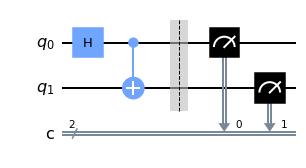

In [3]:
# construct the circuit

# 2 qubits and 2 classical bits
circ = qiskit.QuantumCircuit(2, 2)

# Hadamard gate on qubit 0, putting this qubit in superposition
circ.h(0)
# CX (CNOT) gate on control qubit 0 and target qubit 1, putting the qubits in a Bell state
circ.cx(0, 1)

circ.barrier(range(2))
# map the quantum measurement to the classical bits
circ.measure(range(2), range(2))

circ.draw()

In [4]:
# use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')

# execute the circuit on the qasm simulator
job = qiskit.execute(circ, backend, shots=1024)

result = job.result()
# counts should be 50% on average; actual numbers can vary at each run
print('counts:', result.get_counts(circ))

counts: {'00': 498, '11': 526}
